<a href="https://colab.research.google.com/github/Jandhayalasaikiran/codespaces-jupyter/blob/main/DELHI_HOUSE_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(color_codes = True)

In [ ]:
df = pd.read_csv("/content/MagicBricks.csv")
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


# Data preprocessing

In [ ]:
# check the numbers of unique values from all the objects of datatypes
df.select_dtypes(include='object').nunique()

Furnishing       3
Locality       365
Status           2
Transaction      2
Type             2
dtype: int64

In [ ]:
# Remove locality columns becuase its irrevelant (have a lot of data types)
df.drop(columns='Locality',inplace = True)
df.head()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


 # Exploratary data analysis

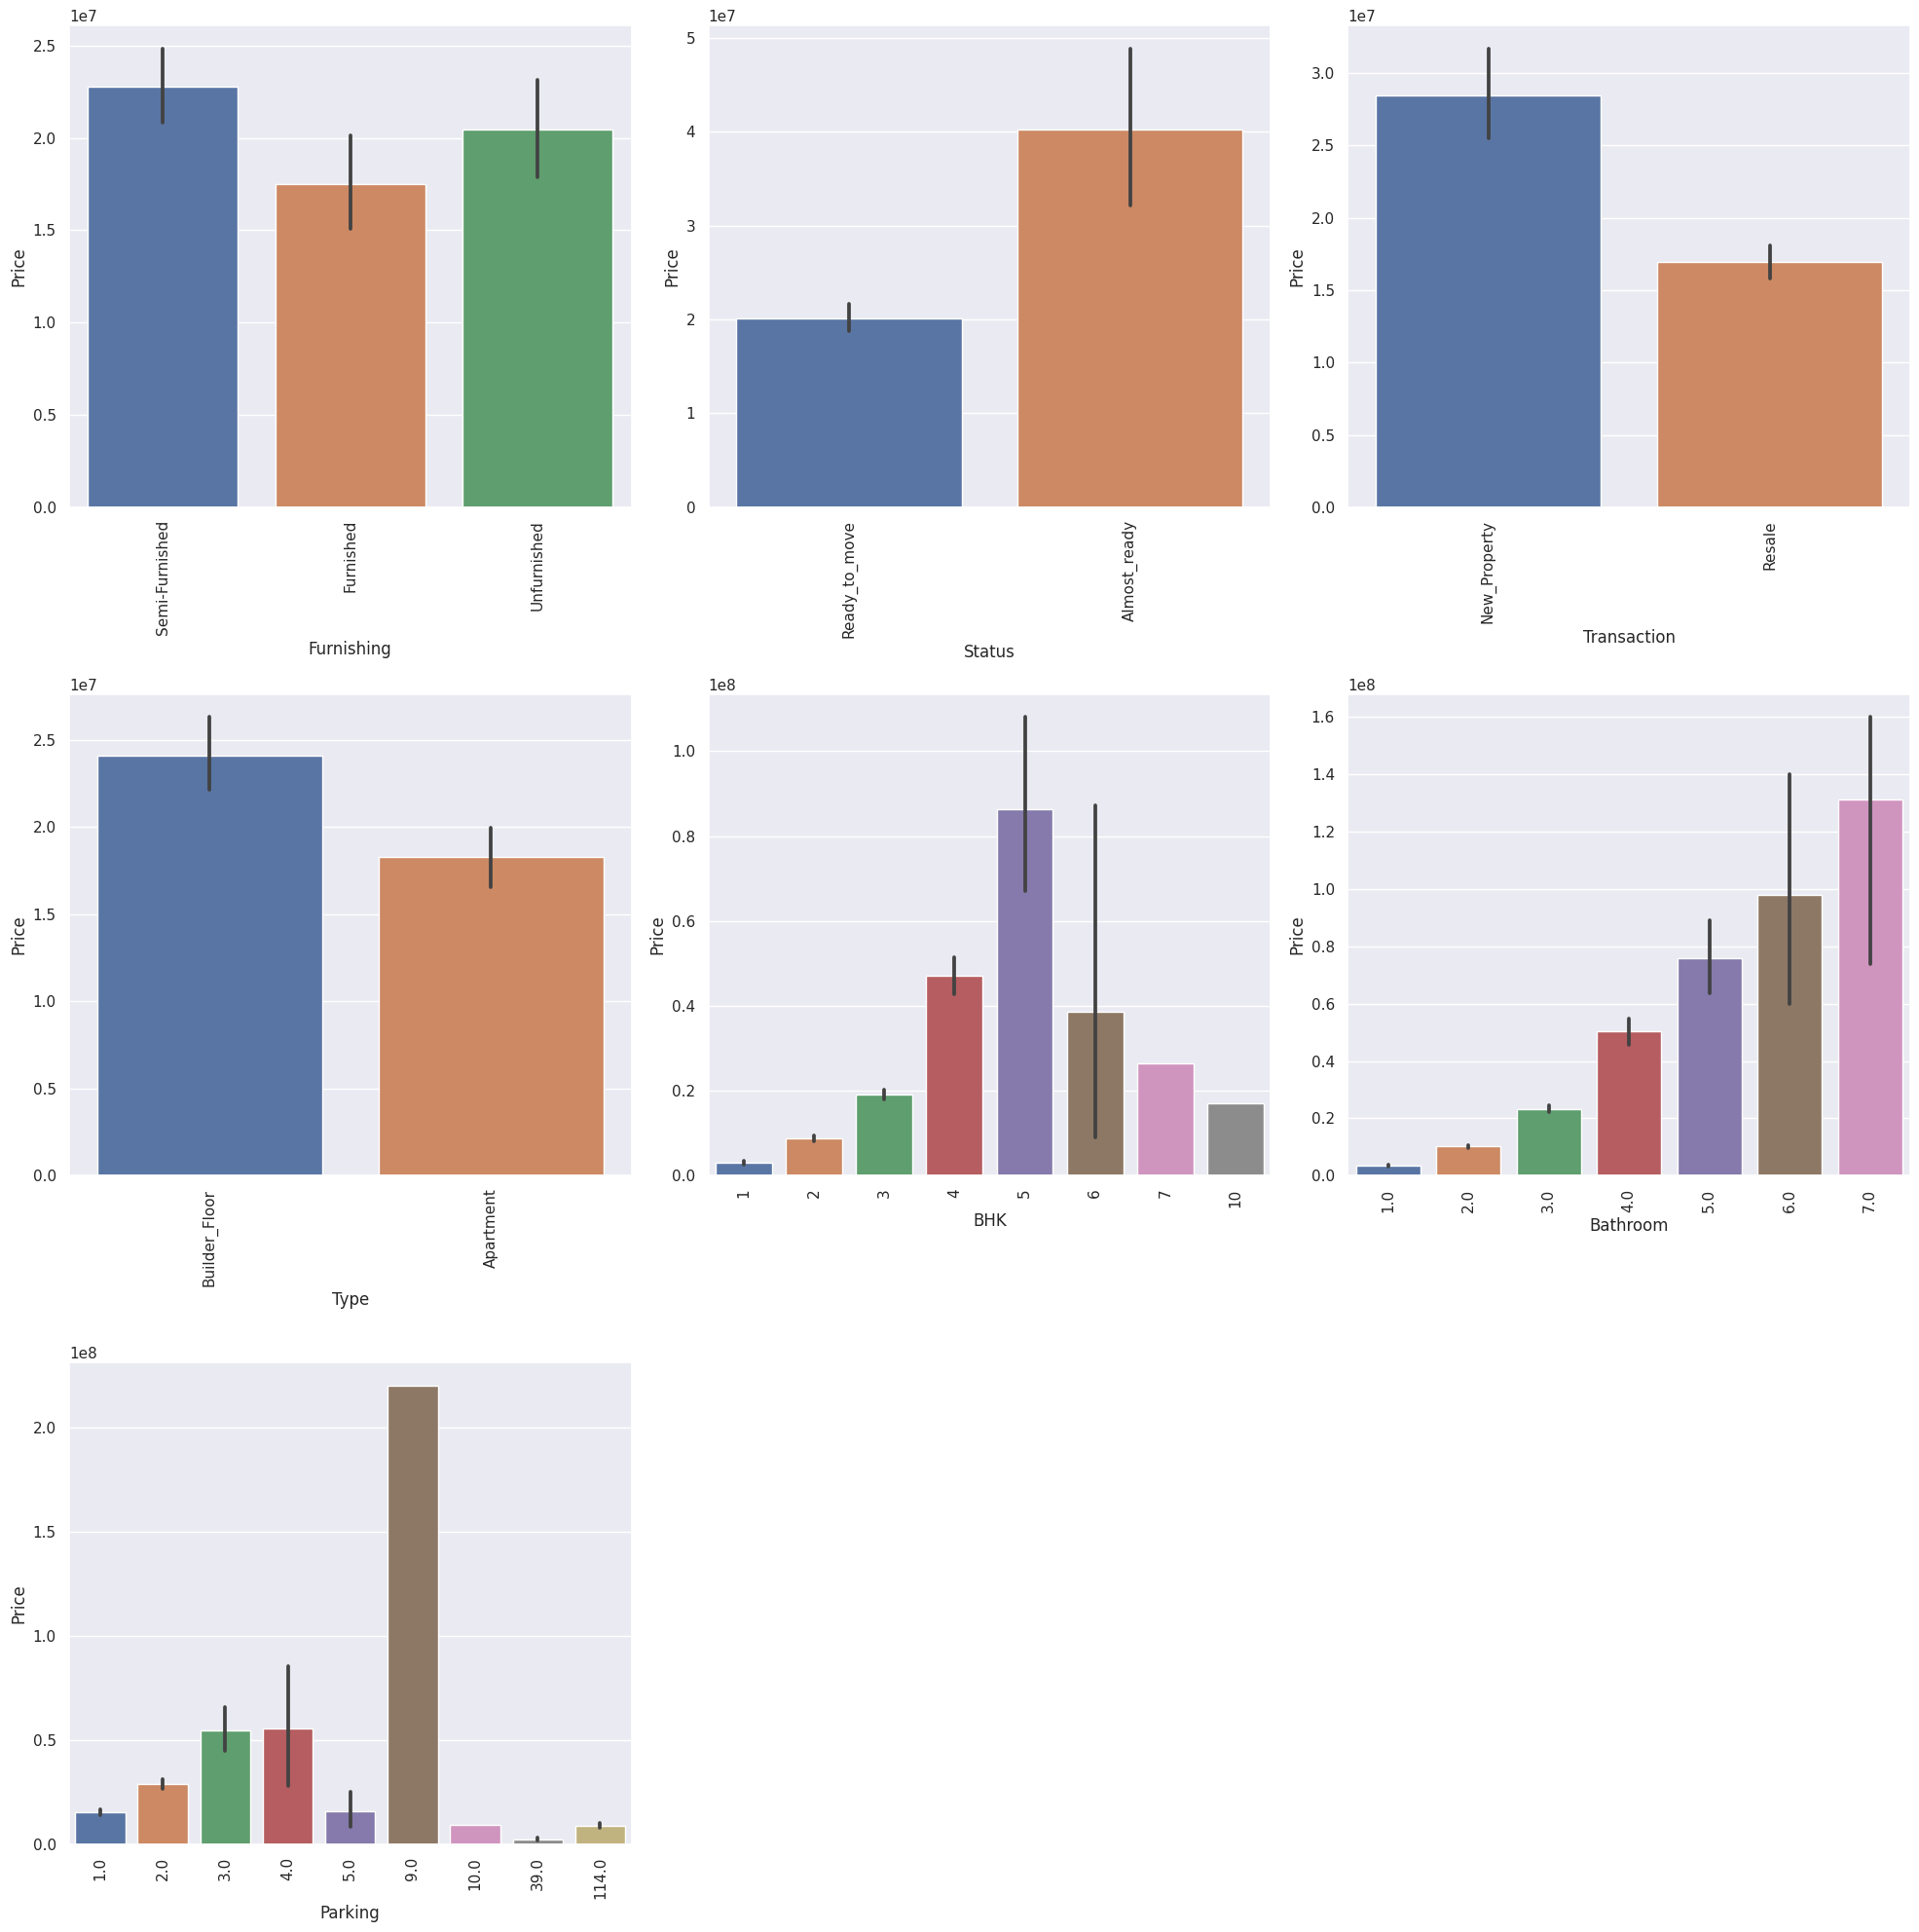

In [ ]:
# list categorical varaiable to plot
cat_vars= ['Furnishing','Status','Transaction','Type','BHK','Bathroom','Parking']

# create figure with subplots
fig ,axs = plt.subplots(nrows=3,ncols=3, figsize=(20,20))
axs = axs.ravel()

# create bar plot for each categorical varaiable 
for i, var in enumerate(cat_vars):
  sns.barplot(x=var,y='Price',data=df,ax=axs[i],estimator=np.mean)
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation= 90)
  
# adjust spacing between two plots
  fig.tight_layout()

# remove the eight subplot
fig.delaxes(axs[7])

#remove the ninth sub plot
fig.delaxes(axs[8])

# show plot
plt.show()

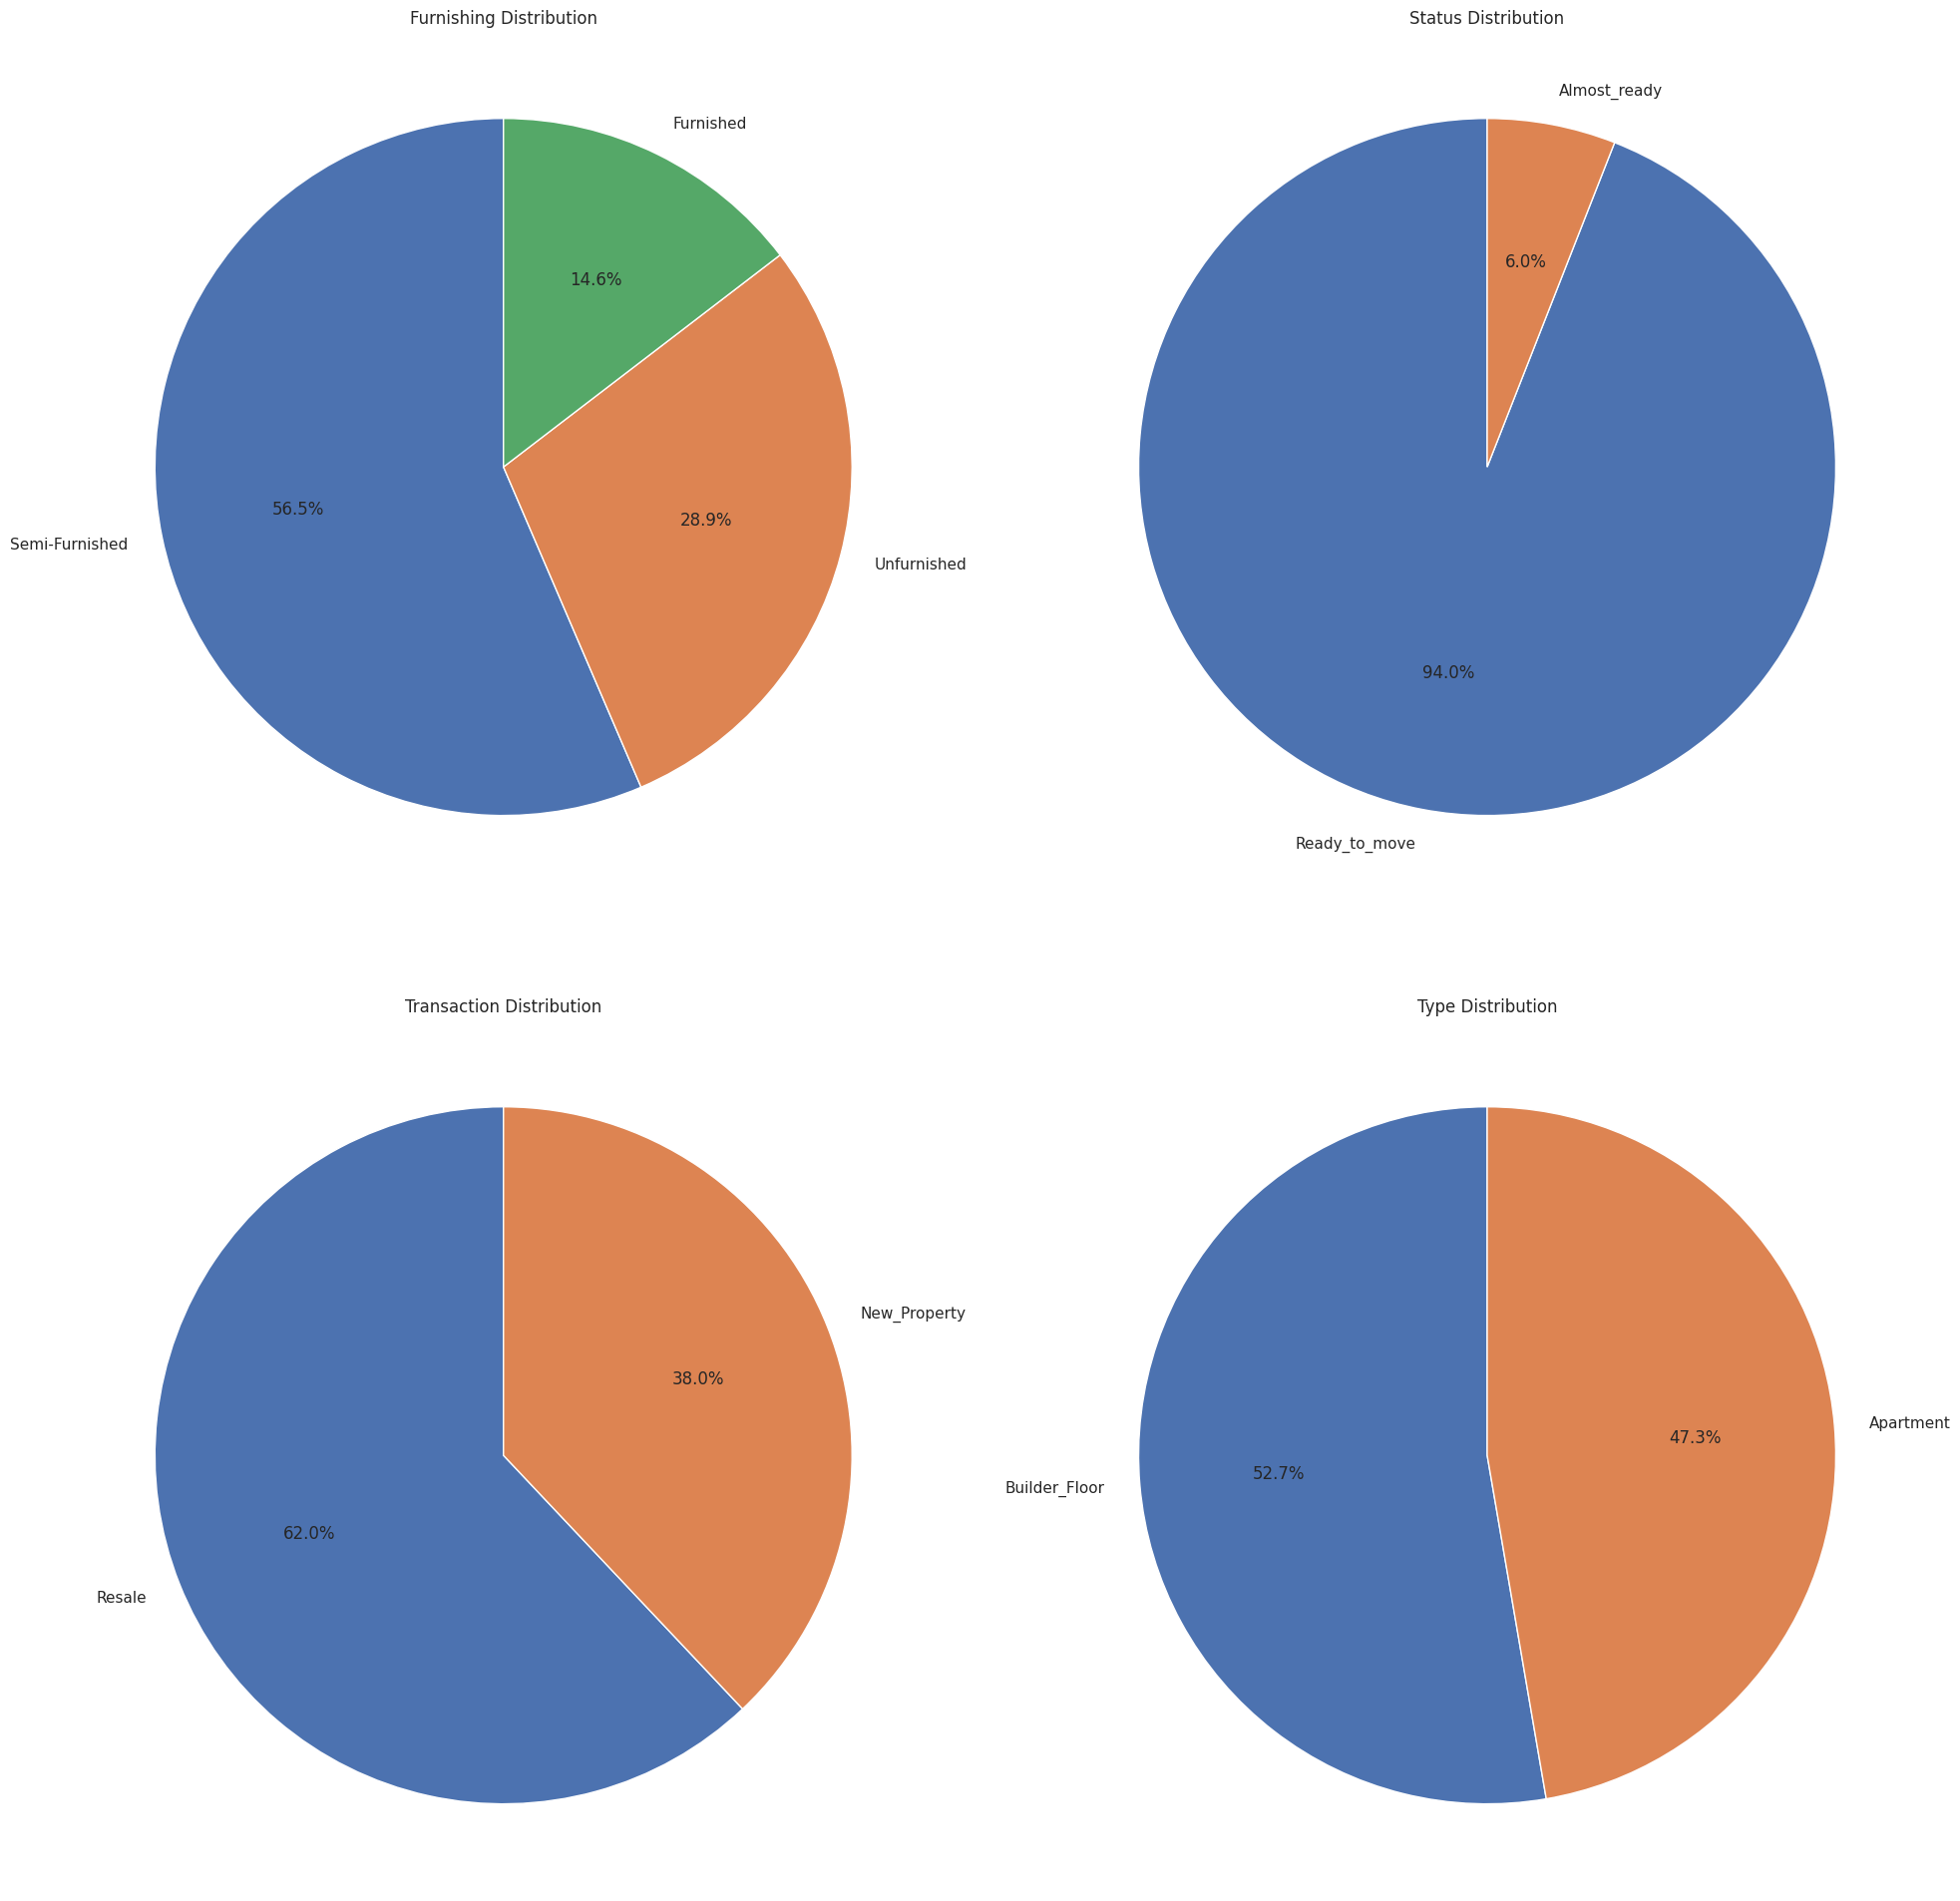

In [ ]:
cat_vars = ['Furnishing','Status', 'Transaction','Type']
# create a figure and axes
fig,axs = plt.subplots(nrows=2, ncols= 2,figsize=(20,20))

# create a pie chart 
for i, var in enumerate(cat_vars):
  if i < len(axs.flat):
    # count the number  of occurences in each category
      cat_counts = df[var].value_counts()

  # create a pie chart
      axs.flat[i].pie(cat_counts, labels =cat_counts.index, autopct='%1.1f%%',startangle=90)

   # set title for eachsubplot
      axs.flat[i].set_title(f'{var} Distribution')

   # adjusting space between subplot
fig.tight_layout()

   # show plot
plt.show()



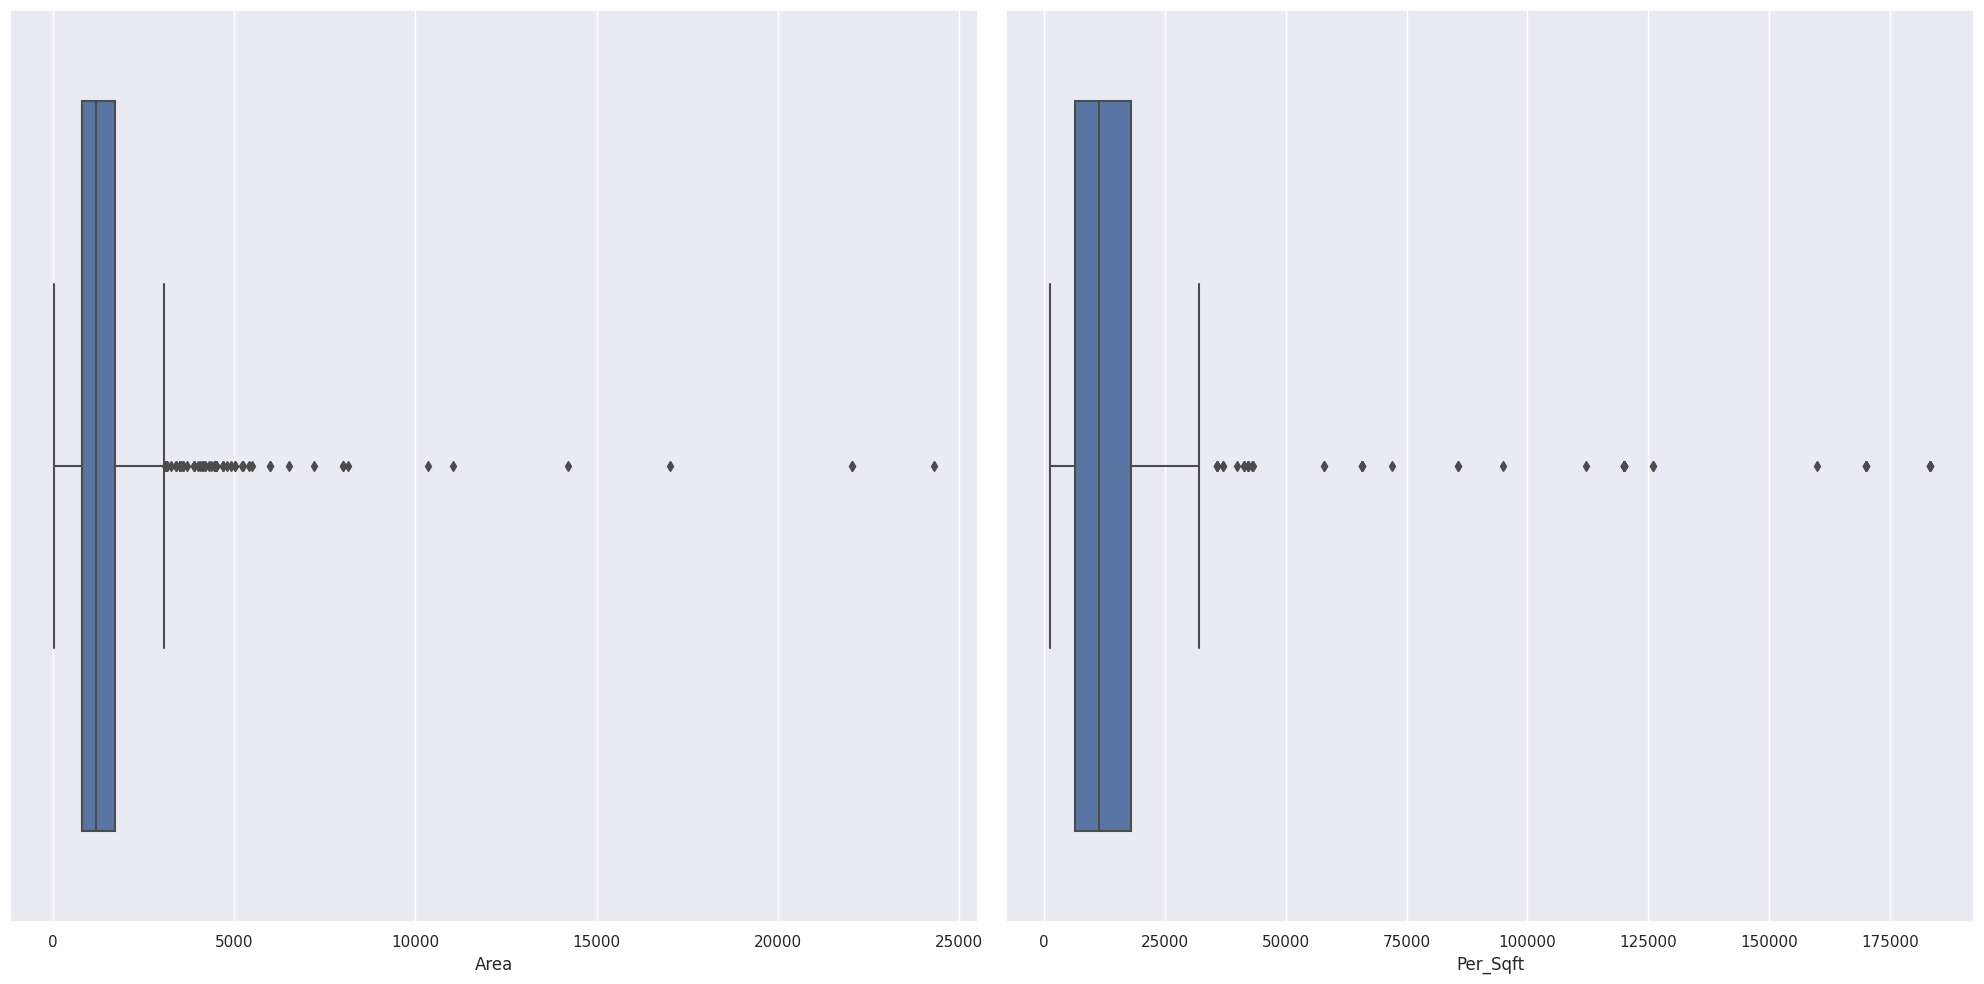

In [ ]:
num_vars= ['Area','Per_Sqft' ] 
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
axs = axs.flatten()
for i, var in enumerate(num_vars):
  sns.boxplot(x=var,data=df,ax=axs[i])
fig.tight_layout()
plt.show()

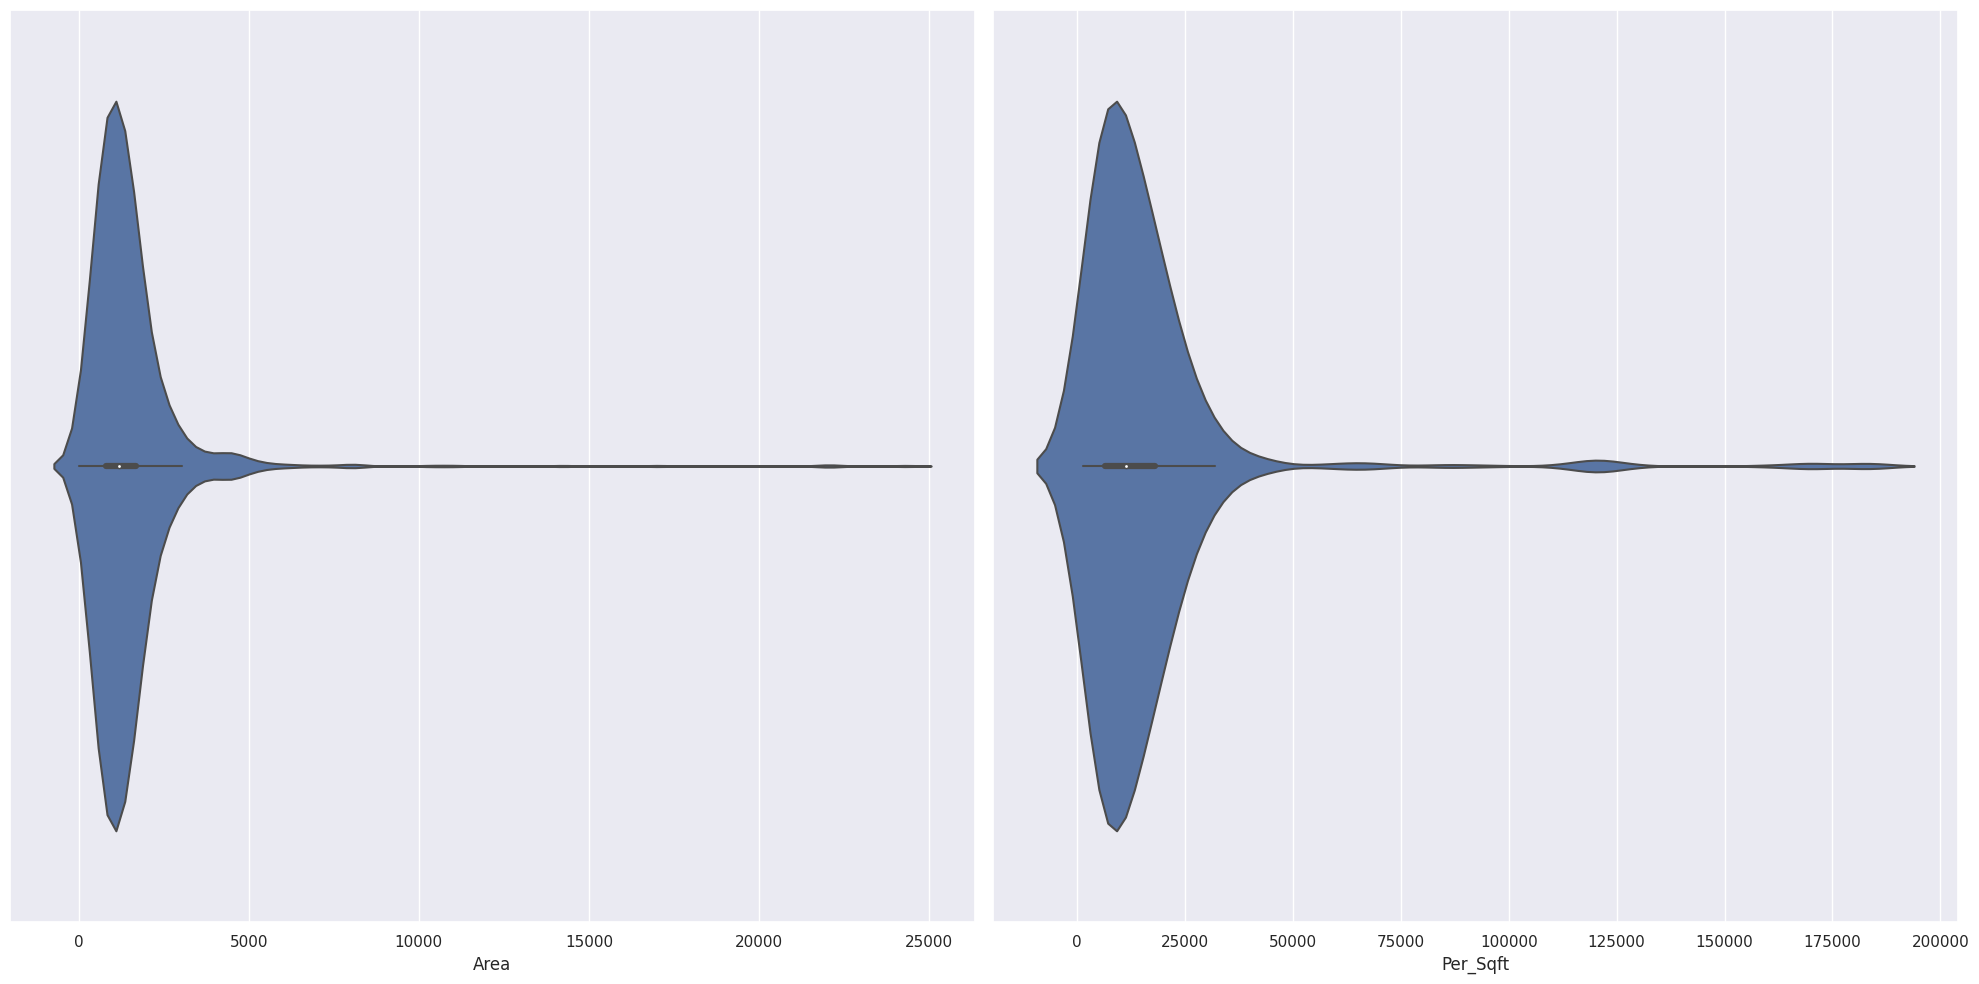

In [ ]:
num_vars =['Area', 'Per_Sqft']
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
for i, var in enumerate(num_vars):
  sns.violinplot(x=var,data=df,ax=axs[i])
fig.tight_layout()
plt.show()

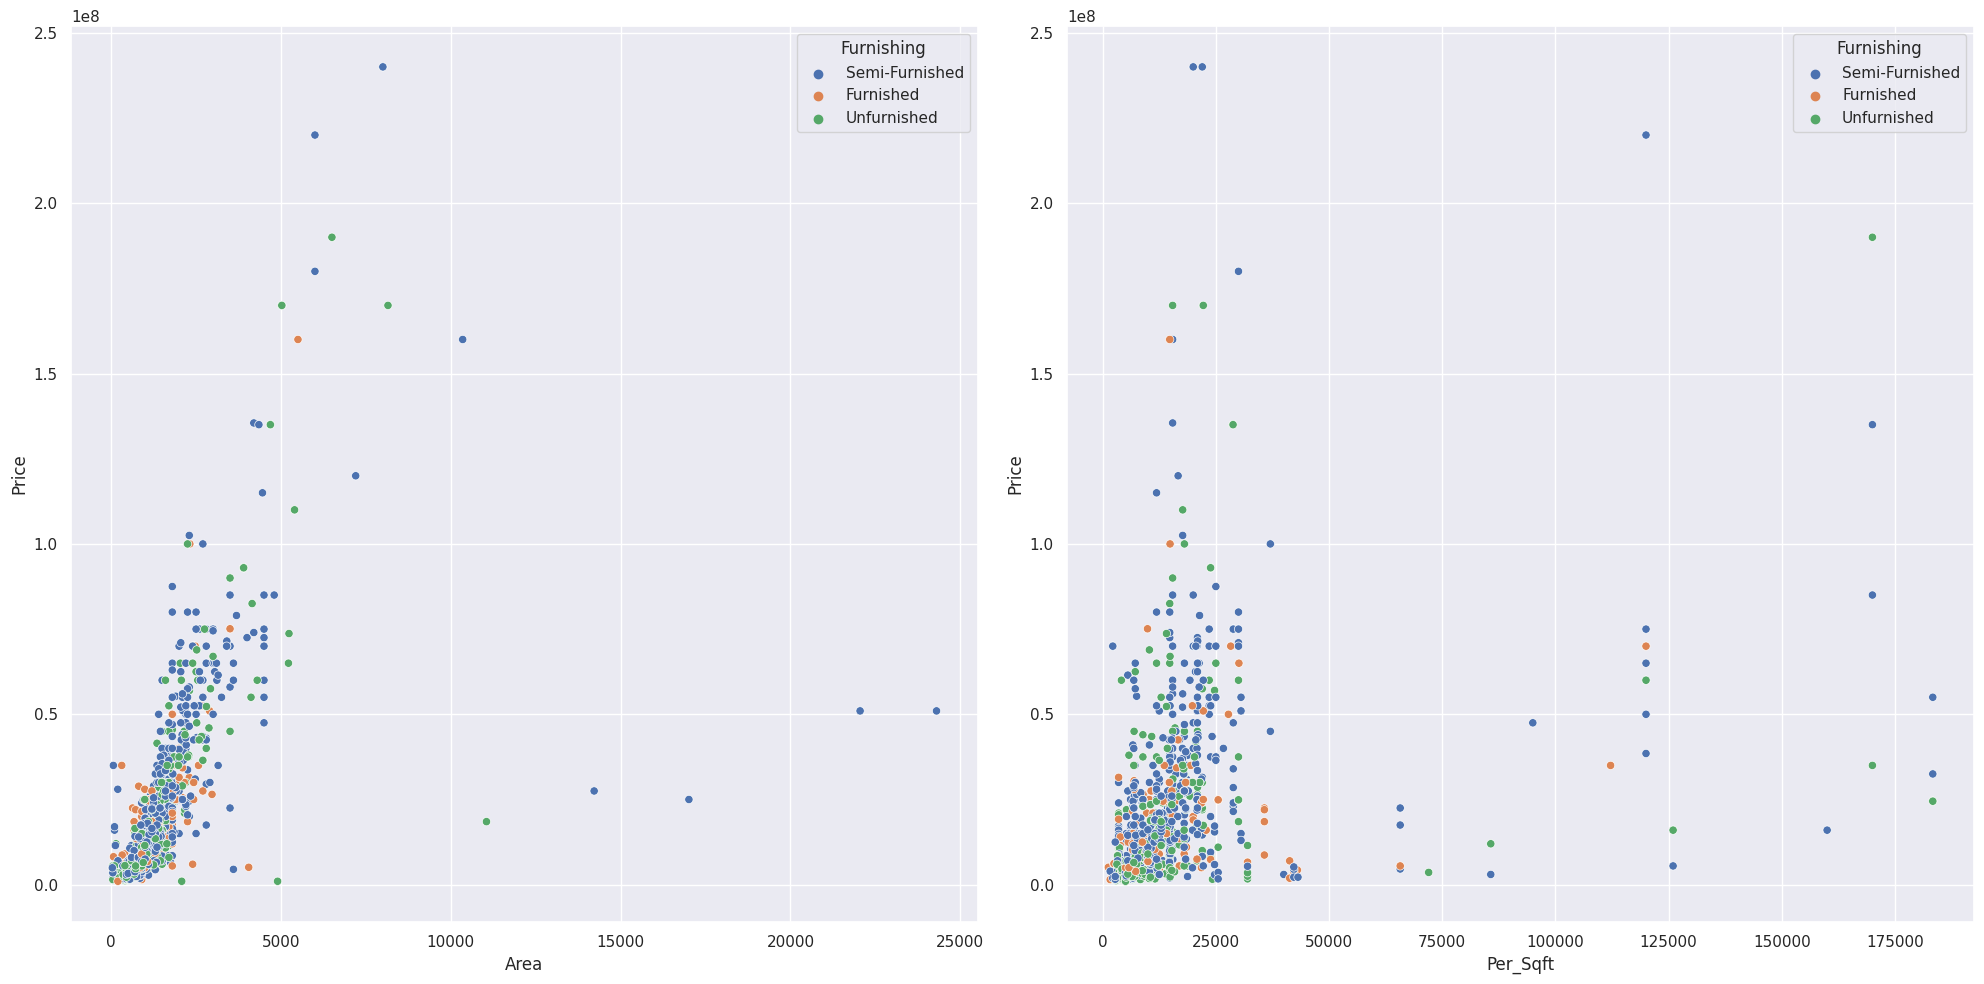

In [ ]:
num_vars = ['Area','Per_Sqft']
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,10))
axs = axs.flatten()
for i, var in enumerate(num_vars):
  sns.scatterplot(x=var, y= 'Price',hue = 'Furnishing',data =df, ax = axs[i])
fig.tight_layout()
plt.show()


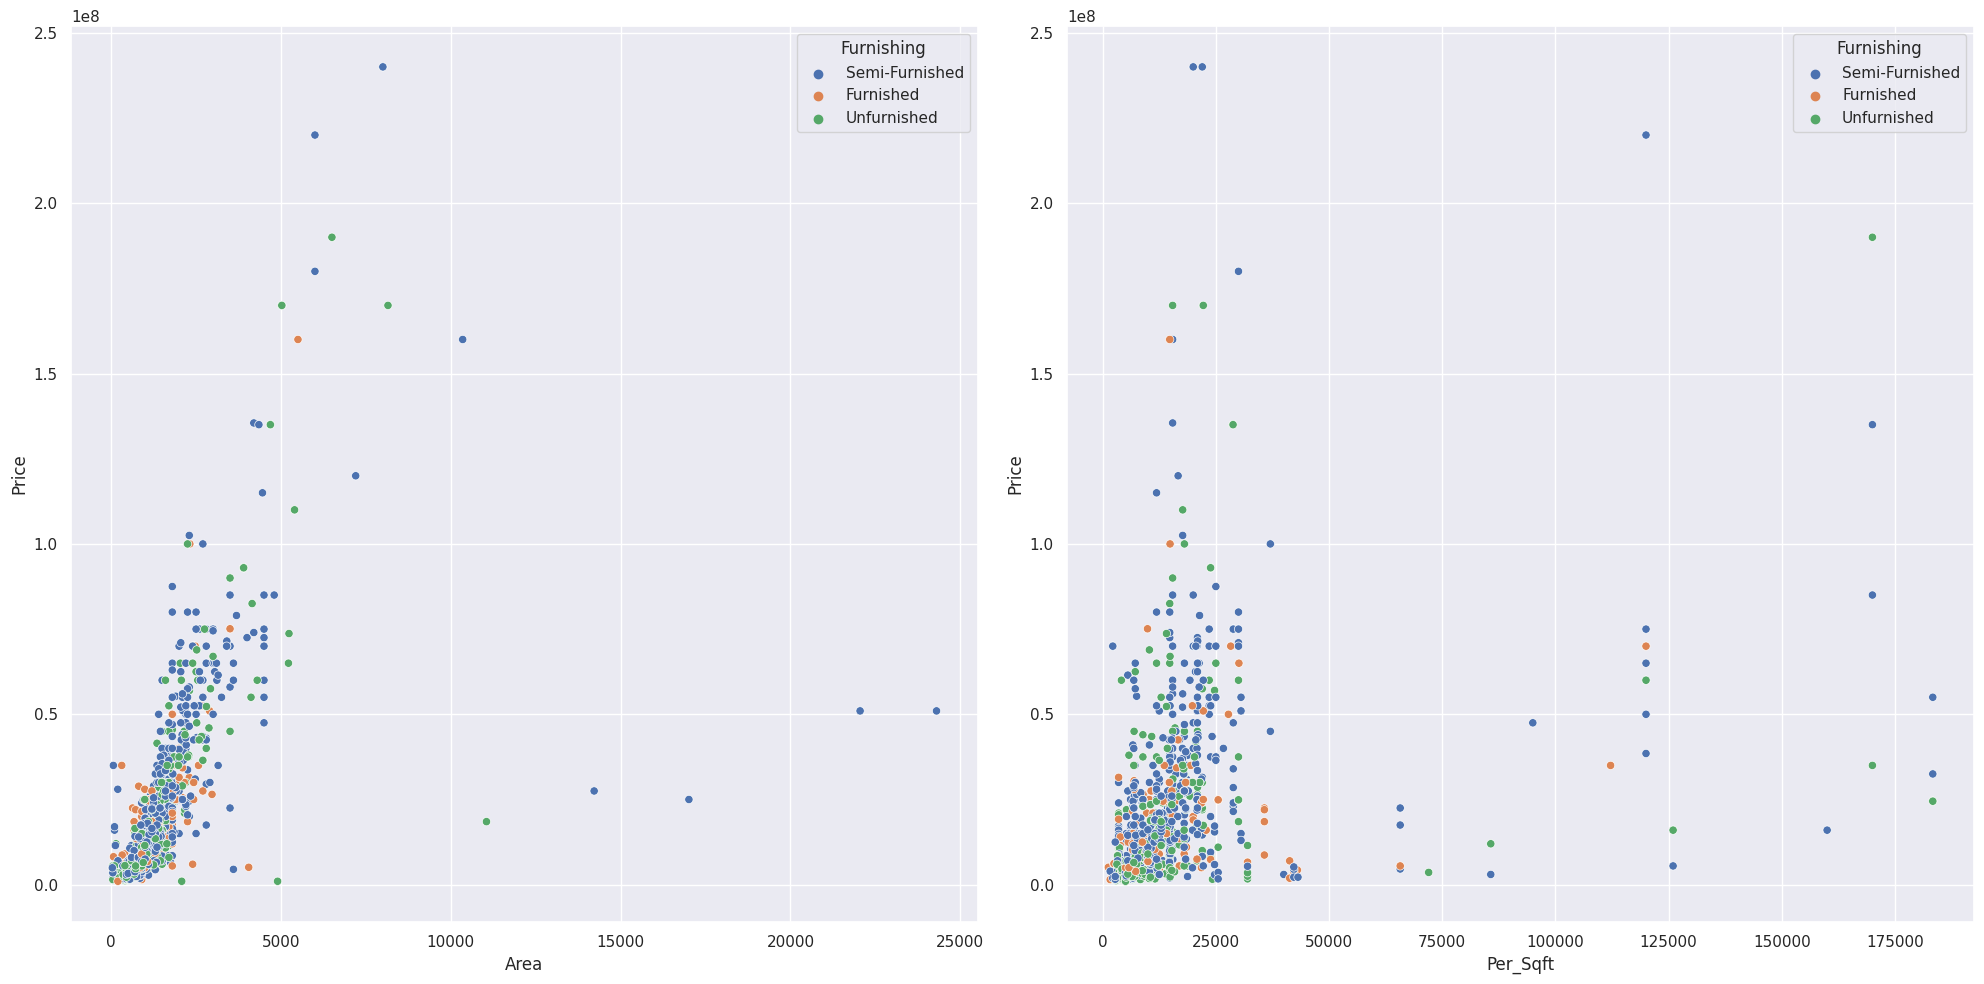

In [ ]:
num_vars= ['Area','Per_Sqft']
fig,axs = plt.subplots(nrows=1, ncols=2,figsize=(20,10))
axs = axs.flatten()
for i,var in enumerate(num_vars):
  sns.scatterplot(x=var,y= 'Price', hue ='Furnishing',data = df , ax = axs[i])
fig.tight_layout()
plt.show()  

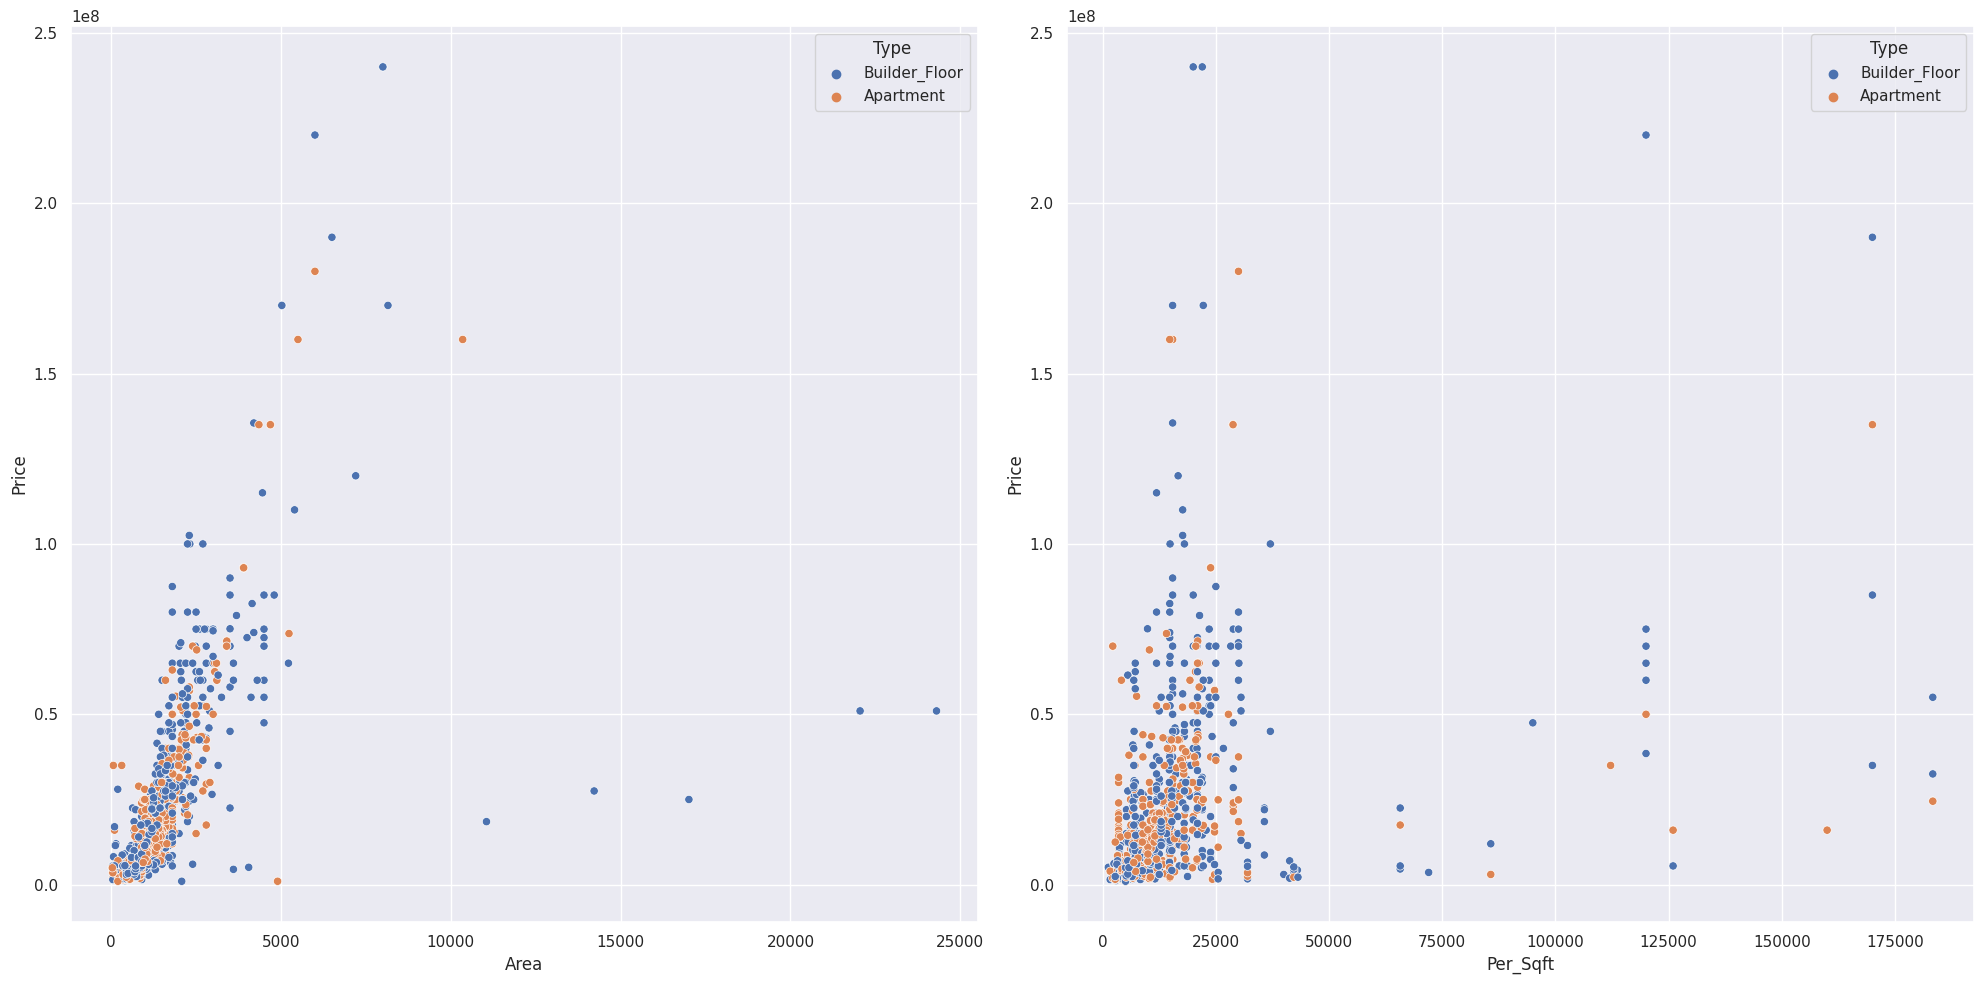

In [ ]:
num_vars = ['Area','Per_Sqft']
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
axs=axs.flatten()
for i, var in enumerate(num_vars):
  sns.scatterplot(x=var,y='Price',hue = 'Type',data=df,ax=axs[i])
fig.tight_layout()
plt.show()

DATA PREPROCESSING

In [ ]:
df.shape

(1259, 10)

In [ ]:
# checking missing values
check_missing=df.isnull().sum () * 100/df.shape[0]
check_missing[check_missing>0].sort_values(ascending=False)

Per_Sqft      19.142176
Parking        2.621128
Furnishing     0.397141
Type           0.397141
Bathroom       0.158856
dtype: float64

In [ ]:
# fill null value with median 
df['Per_Sqft'].fillna(df['Per_Sqft'].median(),inplace=True)
df['Parking'].fillna(df['Parking'].median(),inplace=True)

In [ ]:
#Drop null values in these 3 columns because these null values lessthan 1%
df.dropna(subset=['Furnishing','Type','Bathroom'],inplace=True)
df.head()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,11291.5
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [ ]:
df.shape

(1252, 10)

In [ ]:
# label encoding for object data type
for col in df.select_dtypes(include=['object']).columns:
  #print columns name unique values
  print(f"{col}:{df[col].unique()}")

Furnishing:['Semi-Furnished' 'Furnished' 'Unfurnished']
Status:['Ready_to_move' 'Almost_ready']
Transaction:['New_Property' 'Resale']
Type:['Builder_Floor' 'Apartment']


In [ ]:
from sklearn import preprocessing

# loop over each column in the data frame where dtype in "object"
for col in df.select_dtypes(include=['object']).columns:
  # intialize a label encoder
  label_encoder = preprocessing.LabelEncoder()
  #fit the encoder  to the unique values in the columns
  label_encoder.fit(df[col].unique())
  # transform label encoder 
  df[col] = label_encoder.transform(df[col])
  # print the columns name and the unique encoded values
  print (f"{col}:{df[col].unique()}")




Furnishing:[1 0 2]
Status:[1 0]
Transaction:[0 1]
Type:[1 0]


<Axes: >

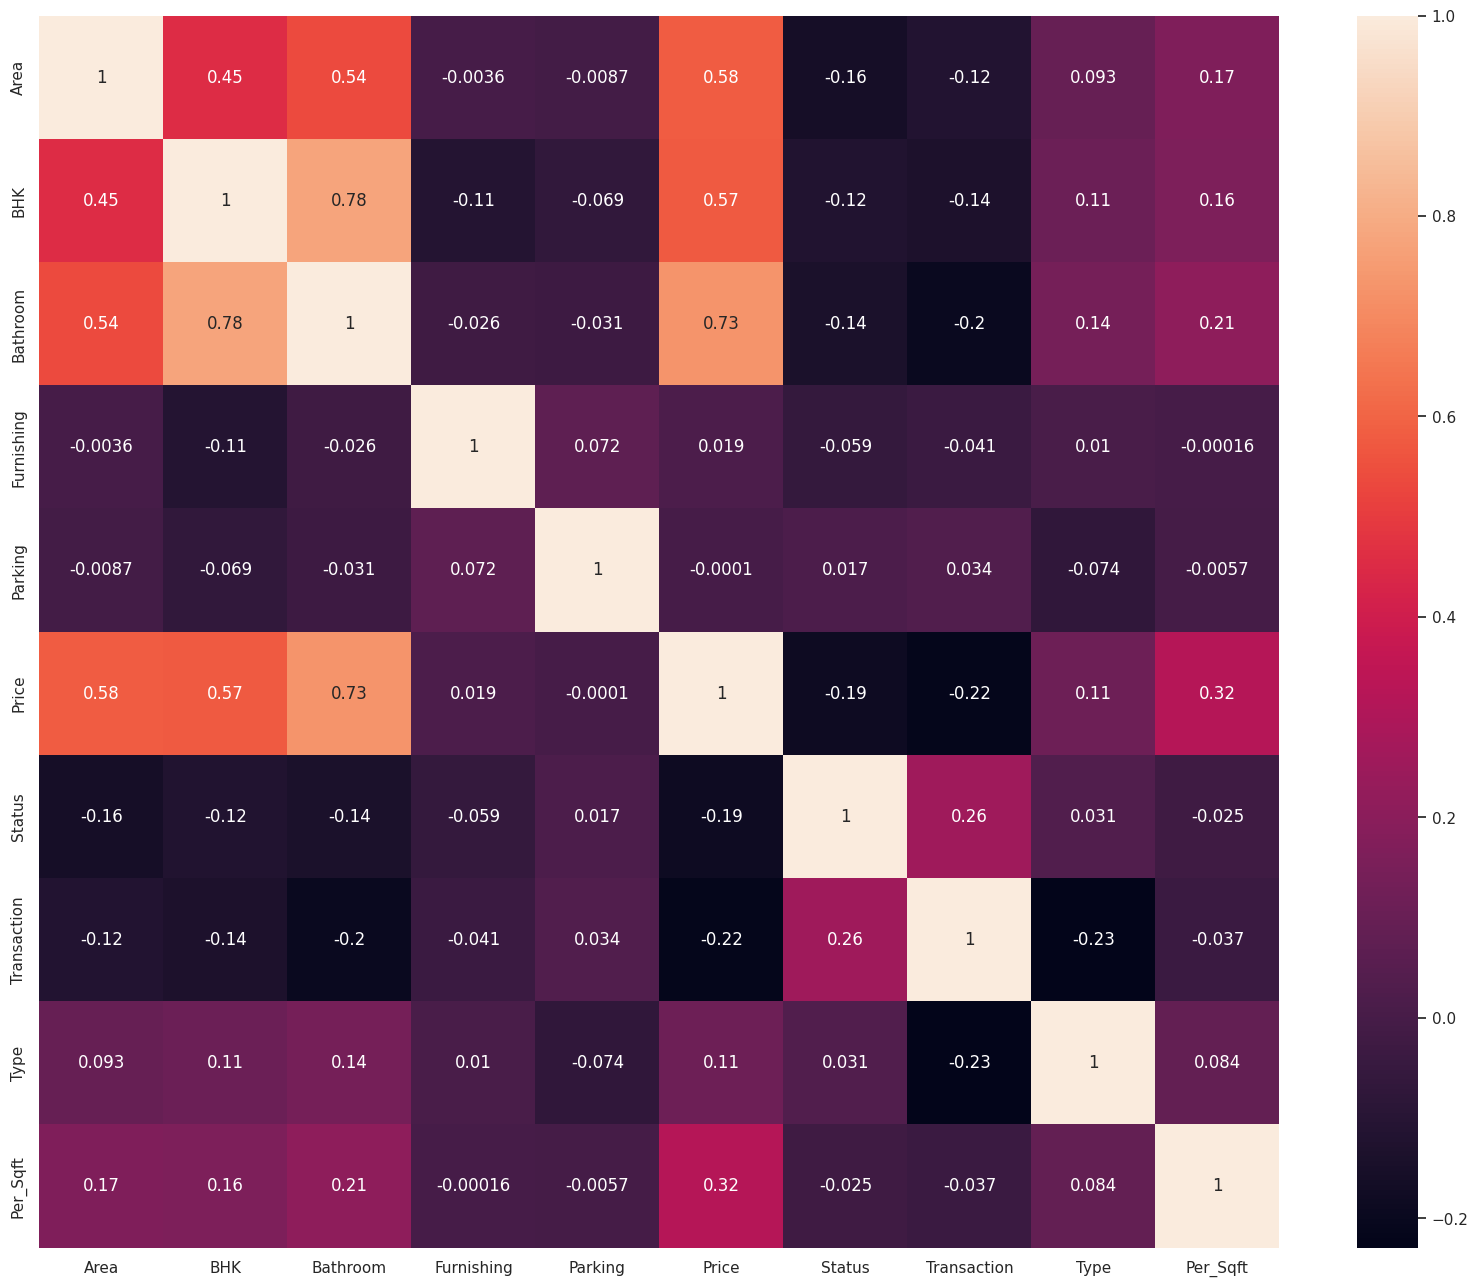

In [ ]:
# correlation heatmap
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), fmt='.2g', annot = True)

In [ ]:
# Train- test split
from sklearn.model_selection import train_test_split
# perform train test split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Price',axis=1),df['Price'],test_size = 0.2,random_state=42)

In [ ]:
# sepearte X_TRAIN AND Y_TRAIN AFTER OUTLIER REMOVAL(remove outlier using iqr range)

#concatenate Xtrain and Ytrain for outlier removal
train_df= pd.concat([X_train, y_train],axis=1)

# calculate the iqr values for columns

Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3-Q1

# REMOVE OUTLIER FROM X_TRAIN
train_df = train_df[~((train_df < Q1-1.5*IQR))| (train_df>(Q3+1.5*IQR)).any(axis=1)]

# SEPERATE x_TRAIN AND Y_TRAIN AFTER OUTLIER REMOVAL
X_train = train_df.drop('Price',axis=1)
y_train = train_df['Price']


Decision tree Regresor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV



In [113]:
# create decision tree
dtree= DecisionTreeRegressor()

In [ ]:
max

ValueError: ignored

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math

In [114]:
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse = math.sqrt(mse)

NotFittedError: ignored

In [ ]:
print('Mae is {}'.format(mae))
print('Mape is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 is {}'.format(r2))
print('RMSE score is{}'.format(rmse))

Mae is 7485785.073785347
Mape is 0.9912224765613337
MSE is 223602482024500.25
R2 is 0.704689589777058
RMSE score is14953343.506537268


In [ ]:
imp_df=pd.DataFrame({
    "Feature name ": X_train.columns,
    "Importance": dtree.feature_importances_  
})

fi = imp_df.sort_values(by = "Importance",ascending=False)

fi2 = fi.head(10)

plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x ='Importance',  y ='Feature Name')
plt.title("Feature importance Each Attributes(Decision Tree Regressor)",fontsize=18)
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Feature Name',fontsize= 16)
plt.show()

AttributeError: ignored